In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import csv
import re
import nltk
import random
import string

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator


from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer


from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

import os, sys, logging, traceback, codecs, datetime, copy, time, ast, math, re, random, shutil, json, csv, multiprocessing, subprocess
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import itertools
import collections
import sklearn
from sklearn.feature_extraction.text import CountVectorizer


import nltk
from nltk.corpus import stopwords
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')



import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
import re
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator

from collections import Counter

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Hartej/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/Hartej/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
#Import datasets 

data =pd.read_csv("./stock_data.csv", sep=",")

In [3]:
#Format/Description 

In [4]:
data.describe()

,Sentiment
count,5791.000000
mean,0.272664
std,0.962192
min,-1.000000
25%,-1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [5]:
print('Dataset size:',data.shape)
print('Columns are:',data.columns)

Dataset size: (5791, 2)
Columns are: Index(['Text', 'Sentiment'], dtype='object')


In [6]:
#Values missing  = Yes

data.isnull().sum()

Text         0
Sentiment    0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5791 entries, 0 to 5790
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       5791 non-null   object
 1   Sentiment  5791 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 90.6+ KB


In [8]:
data.rename(columns={'Sentiment': 'sentiment', 'Text': 'text'}, inplace=True)

<AxesSubplot:xlabel='sentiment', ylabel='count'>

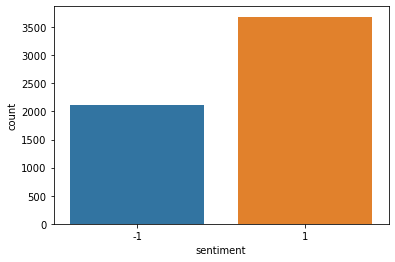

In [9]:
sns.countplot(x = 'sentiment', data = data)

In [10]:
data["sentiment"].value_counts()

 1    3685
-1    2106
Name: sentiment, dtype: int64

In [11]:
#stopwords = nltk.corpus.stopwords.words('english')
#punctuation = string.punctuation

In [12]:
#Top 50 words

In [13]:
data.head(5)

,text,sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1


In [14]:
import nltk
from nltk import tokenize

tokenSpace = tokenize.WhitespaceTokenizer()
def counter(text, columnText, quantity):
    allWords = ' '.join([text for text in text[columnText].astype('str')])
    tokenPhrase = tokenSpace.tokenize(allWords)
    frequency = nltk.FreqDist(tokenPhrase) 
    dfFrequency = pd.DataFrame({"Word": list(frequency.keys()), "Frequency": list(frequency.values())}) 
    
    dfFrequency = dfFrequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(14,8))
    ax = sns.barplot(data = dfFrequency, x = "Word", y = "Frequency", palette="deep")
    ax.set(ylabel = "Count")
    plt.xticks(rotation='horizontal')
    plt.show()

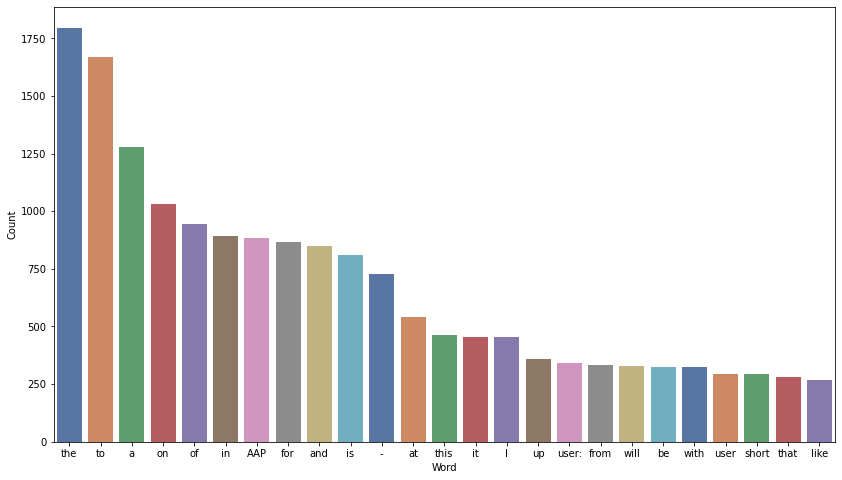

In [15]:
counter(data, 'text', 25)

In [16]:
# Pre-processing needed 

In [17]:
#Pre-processing 

In [18]:
#Stopwords

stopwords = nltk.corpus.stopwords.words('english')
data['pro'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

In [19]:
# Below list represents objects; did not take all the intersected words into consideration
#stopwords.extend(['one', 'make', 'really', 'get', 'go',
#                  'see', 'also', 'would', 'think', 'come', 'ever','in','is','the',
#                  'even', 'say', 'look', 'could', 'back','to','for','RT','of','is','a','and','Inc.','Inc','Register',
#                  'analyst', 'group', 'the', 'BONUS', 'Binance', 'new', 'investment', 'has','Jim','Crammer'])
# stopwords.extend(['movie', 'film', 'phone', 'food', 'place','service', 'product'])
# "not" can be used in "not good" as well as "not bad", so removing it from the list is important
# "really" and "very" were removed as with using bigrams, they can show more emphasis whether an item is
## very good or really bad
#stopwords = [e for e in stopwords if e not in ('no', 'nor', 'not')]

In [20]:
# Below list represents objects; did not take all the intersected words into consideration
stopwords.extend(['one', 'make', 'get', 'go', 'like', 'This', 'today', 'imgur',
                  'see', 'also', 'would', 'think', 'come', 'ever', 'Jim', 'Cramer', 'says', 'The',
                  'even', 'say', 'look', 'could', 'back','•', 'CLICK', 'FOR', 'HERE'])
# stopwords.extend(['movie', 'film', 'phone', 'food', 'place','service', 'product'])
# "not" can be used in "not good" as well as "not bad", so removing it from the list is important
# "really" and "very" were removed as with using bigrams, they can show more emphasis whether an item is
## very good or really bad
#stopwords = [e for e in stopwords if e not in ('no', 'nor', 'not')]

In [21]:
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [22]:
#Removed mentions, hastags, RT, hyperlinks 
def clean_text(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    
    return text 

In [23]:
data['pro']= data['pro'].apply(clean_text)

In [24]:
#lemmatization

#wn = nltk.WordNetLemmatizer()

#def lemmatizer(text):
#    text = [wn.lemmatize(word) for word in text]
#    return text

#data['pro'] = data['pro'].apply(lambda x: lemmatizer(x))

In [25]:
data.head()

,text,sentiment,pro
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers watchlist XIDE TIT SOQ PNK CPW BPZ AJ ...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user: AAP MOVIE. 55% return FEA/GEED indicator...
2,user I'd be afraid to short AMZN - they are lo...,1,user I'd afraid short AMZN - looking like near...
3,MNTA Over 12.00,1,MNTA Over 12.00
4,OI Over 21.37,1,OI Over 21.37


In [26]:
# Redo Word Frequency 

In [27]:
import nltk
from nltk import tokenize

tokenSpace = tokenize.WhitespaceTokenizer()
def counter(text, columnText, quantity):
    allWords = ' '.join([text for text in text[columnText].astype('str')])
    tokenPhrase = tokenSpace.tokenize(allWords)
    frequency = nltk.FreqDist(tokenPhrase) 
    dfFrequency = pd.DataFrame({"Word": list(frequency.keys()), "Frequency": list(frequency.values())}) 
    
    dfFrequency = dfFrequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(40,30))
    ax = sns.barplot(data = dfFrequency, x = "Word", y = "Frequency", palette="deep")
    ax.set(ylabel = "Count")
    plt.xticks(rotation='horizontal')
    plt.show()

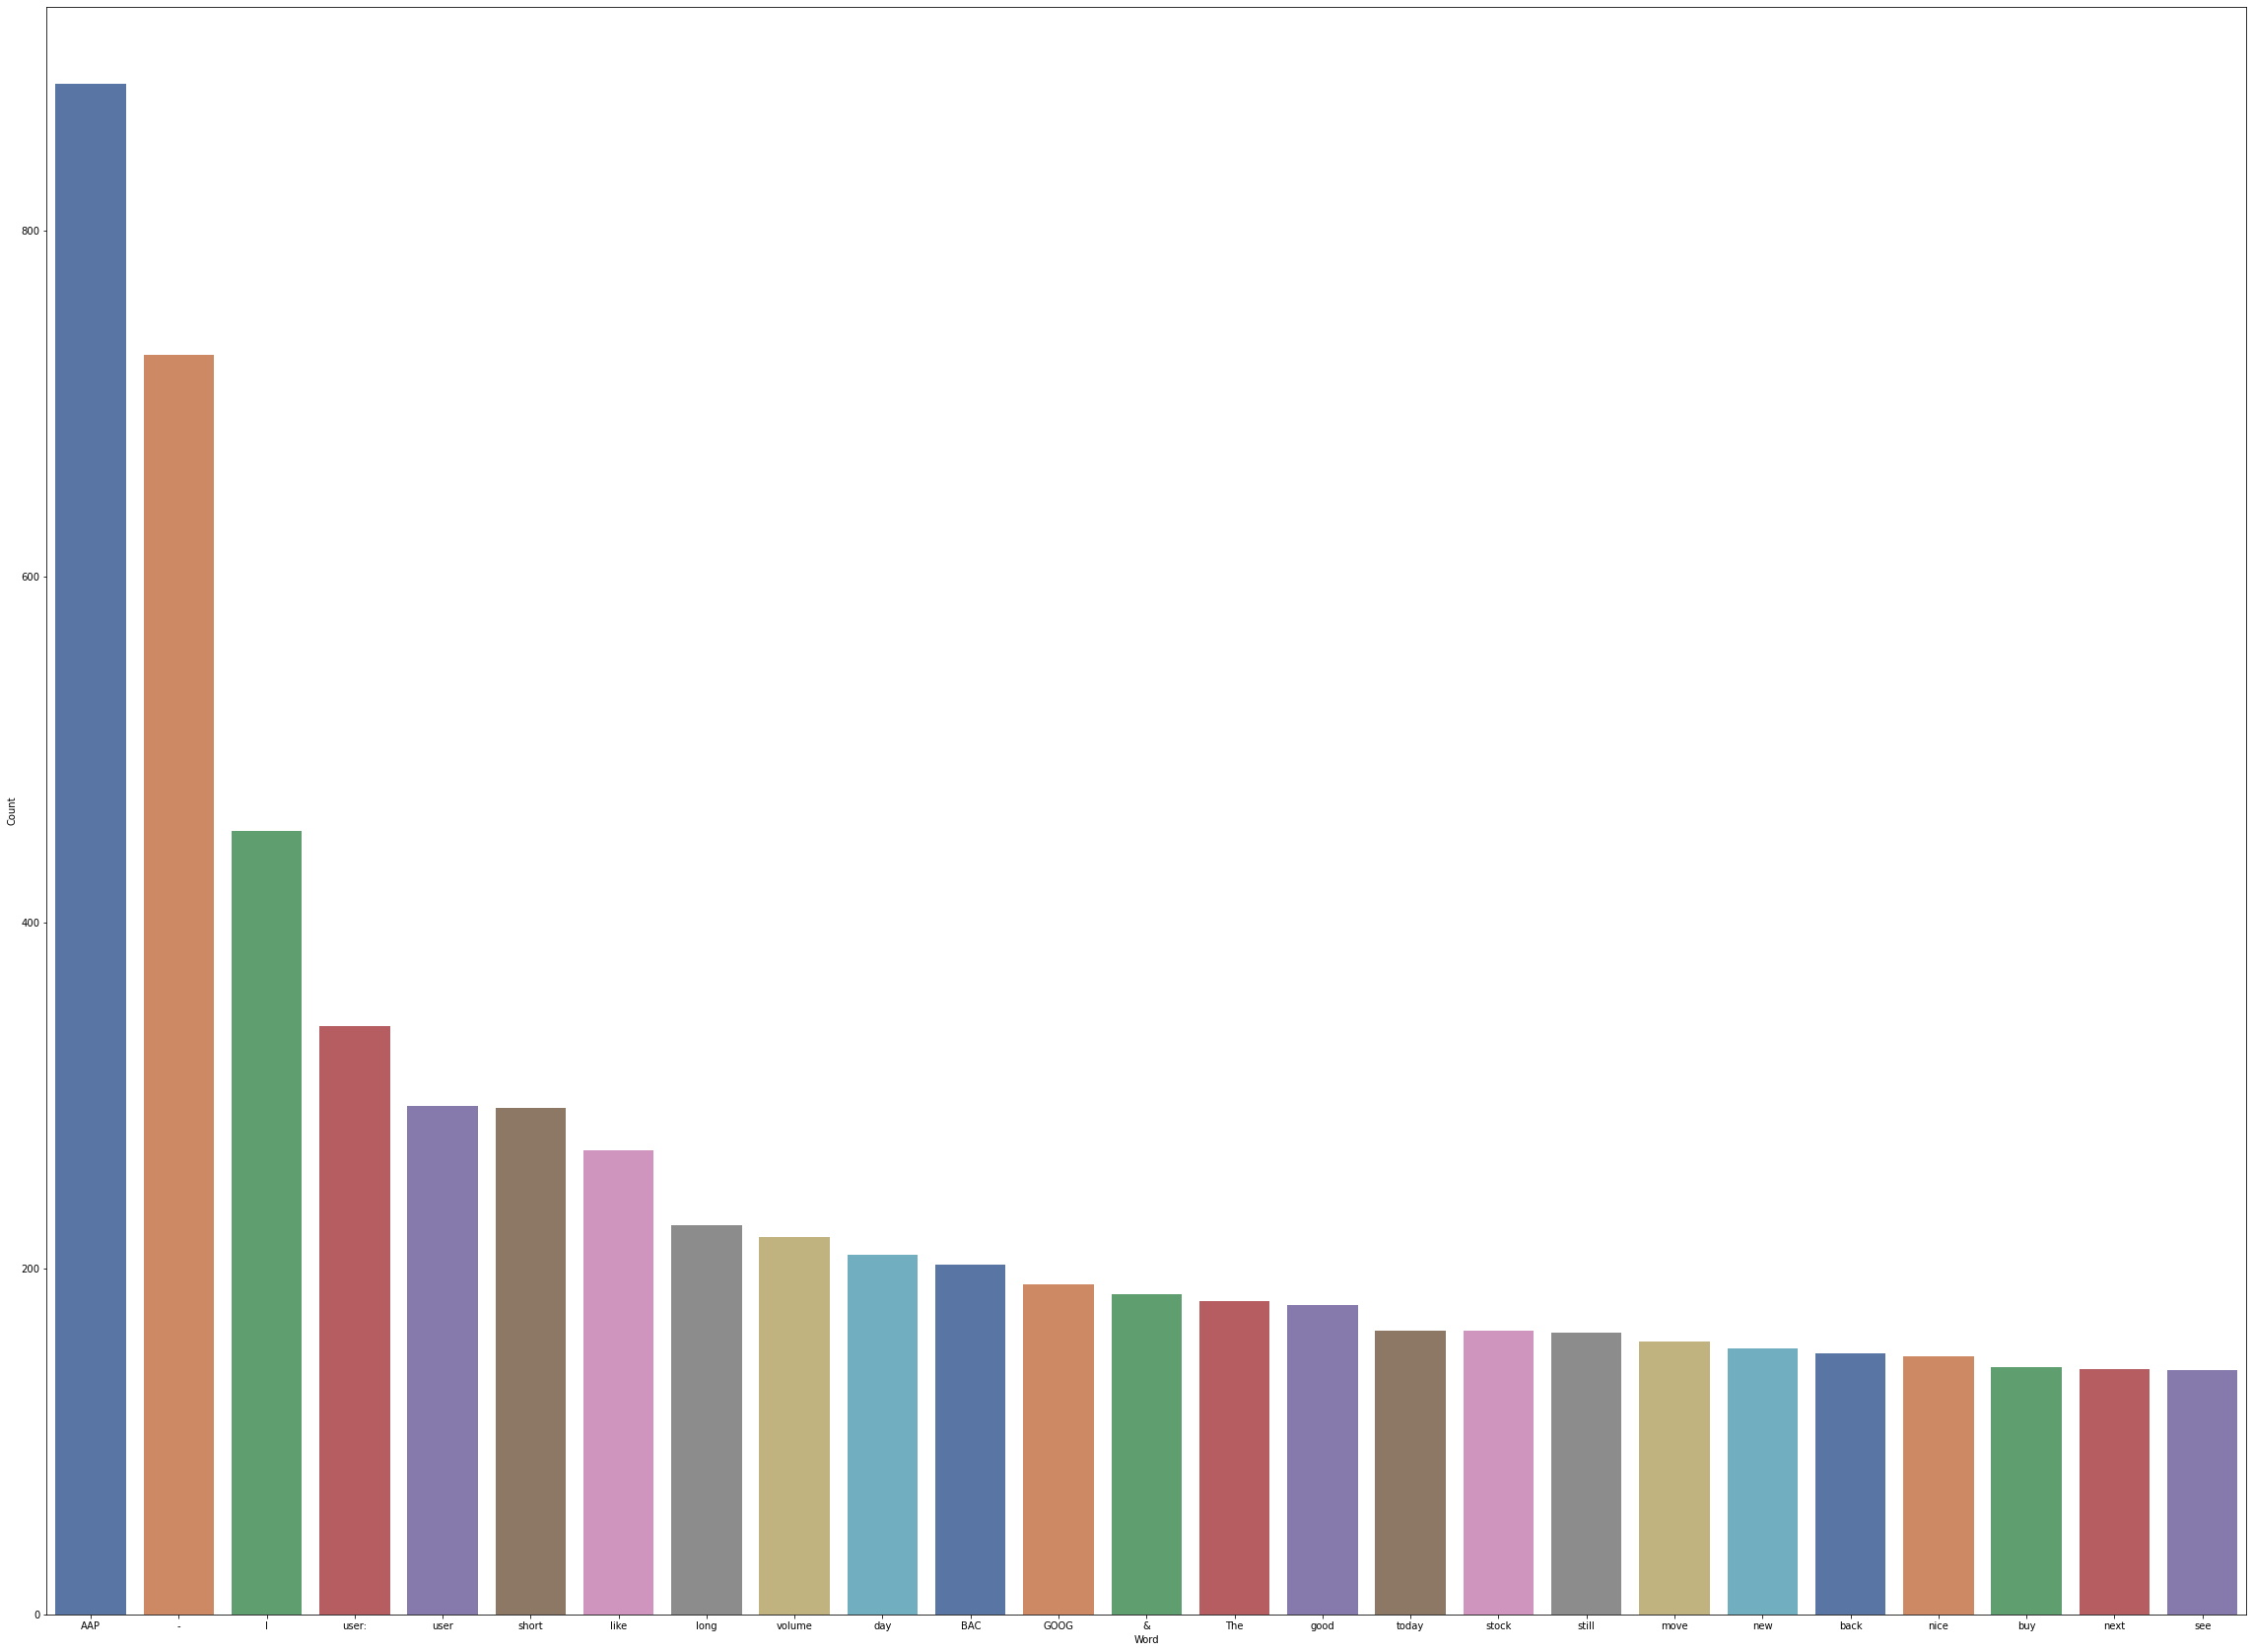

In [28]:
counter(data, 'pro', 25)

In [29]:
#Keeping punctuation as used for emojis which VADER uses 

#Twitter -> Inc., &amp, Group, Inc, INC, BONUS, Binance, Register, has -> Anything which doesnt help sentiment
#News -> Jim, Cramer, says, The, 
#Reddit -> •, CLICK, FOR, HERE

#Additional, 

In [30]:
#import nltk
#from nltk import tokenize

#tokenSpace = tokenize.WhitespaceTokenizer()
#def counter(text, columnText, quantity):
#    allWords = ' '.join([text for text in text[columnText].astype('str')])
#    tokenPhrase = tokenSpace.tokenize(allWords)
#    frequency = nltk.FreqDist(tokenPhrase) 
#    dfFrequency = pd.DataFrame({"Word": list(frequency.keys()), "Frequency": list(frequency.values())}) 
    
#    dfFrequency = dfFrequency.nlargest(columns = "Frequency", n = quantity)
#    plt.figure(figsize=(30,20))
#    ax = sns.barplot(data = dfFrequency, x = "Word", y = "Frequency", palette="deep")
#    ax.set(ylabel = "Count")
#    plt.xticks(rotation='horizontal')
#    plt.show()

In [31]:
#counter(data[data['sentiment'] == '1'], 'pro', 25)
#counter(data, 'text', 25)

In [32]:
# VADER -> BASIC- Only pos and neg, no added words/lexicons 

In [33]:
#Initiate the VADER Sentiment Analyzer

analyzer = SentimentIntensityAnalyzer()

In [34]:
# Get Compound Score of Each text in the DataFrame using VADER
data['compound'] = [analyzer.polarity_scores(x)['compound'] for x in data['pro']]

In [35]:
#del data['Unnamed: 3']
#del data['Unnamed: 4']
#del data['Unnamed: 5']
#del data['Unnamed: 6']
#del data['Unnamed: 7']
#del data['Unnamed: 8']
#del data['Unnamed: 9']

In [36]:
#from textblob import TextBlob

In [37]:
# Function to calculate polarityy
#def get_polarity(text):
#    return TextBlob(text).sentiment.polarity

# Caluculating Polarity of text
#data["polarity"] = data["pro"].apply(get_polarity)

In [38]:
data.head()

,text,sentiment,pro,compound
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers watchlist XIDE TIT SOQ PNK CPW BPZ AJ ...,0.0000
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user: AAP MOVIE. 55% return FEA/GEED indicator...,0.7034
2,user I'd be afraid to short AMZN - they are lo...,1,user I'd afraid short AMZN - looking like near...,0.3612
3,MNTA Over 12.00,1,MNTA Over 12.00,0.0000
4,OI Over 21.37,1,OI Over 21.37,0.0000


In [39]:
#Set VADER Sentiment Class to Positive if compound > 0 and to Negative if compound < 0 
data['prediction_vader'] = data['compound'].apply(lambda x: 1 if x > 0 else -1)

In [40]:
print("Vader Accuracy: " + str(accuracy_score(data['sentiment'], data['prediction_vader'])))

Vader Accuracy: 0.5349680538767052


In [41]:
print('Confusion Matrix')
print(confusion_matrix(data['sentiment'], data['prediction_vader']))
print('\nClassification Report')
#target_names = ['Positive', 'Negative', 'Neutral']
target_names = ['Positive', 'Negative']
print(classification_report(data['sentiment'], data['prediction_vader'], target_names=target_names))

Confusion Matrix
[[1492  614]
 [2079 1606]]

Classification Report
              precision    recall  f1-score   support

    Positive       0.42      0.71      0.53      2106
    Negative       0.72      0.44      0.54      3685

    accuracy                           0.53      5791
   macro avg       0.57      0.57      0.53      5791
weighted avg       0.61      0.53      0.54      5791



In [1]:
#New sentiment dataset 

#Blob Accuracy: 0.5258159212571232
#Vader Accuracy: 0.5349680538767052

In [ ]:
# Stopwords = VADER Accuracy: 0.5527285513361463 
# Stopwords + Additional words = VADER Accuracy: 0.5631153305203938